#### 학습목표
- 기울기 (w)
- 절편 (b)
- 회귀 평가 방법
- 피처, 타겟의 스케일링
- 캐글데이터를 활용한 실습

In [1]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# 기울기

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

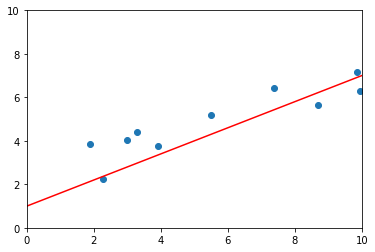

In [14]:
# 경사하강법으로 최적화된 결과값이 도출됨
# f(x) = w*x + b -->cost(w,b)


w = 0.6
b = 1

plt.figure()
plt.scatter(X,Y)
plt.plot([0,10], [b, 10*w + b], c='red')

plt.xlim(0,10)
plt.ylim(0,10)

plt.show()
plt.close()

In [22]:
# w * x.T + b
def prediction(a, b, x):
    result = x*a.T + b
    return result

In [27]:
def update_ab(a, b, x, error, Ir):
    a_delta = -(Ir * (2/len(error)) * (np.dot(x.T, error)) )
    b_delta = -(Ir * (2/len(error)) * np.sum(error) )
    return a_delta , b_delta

In [28]:
def gradient_descent(x, y, iters):
    a = np.zeros((1,1))
    b = np.zeros((1,1))
    
    for idx in range(iters):
        error = y - prediction(a, b, x)
        a_delta, b_delta = update_ab(a, b, x, error, Ir=learning_rate)
        a -= a_delta
        b -= b_delta
    return a, b

In [34]:
def plotting_graph(x, y, a, b):
    y_pred = a[0,0] * x + b
    
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_pred, c='green')
    
    
    
    plt.show()
    plt.close()

weight :  [[3.34845331]] bias : [[1.30802168]]


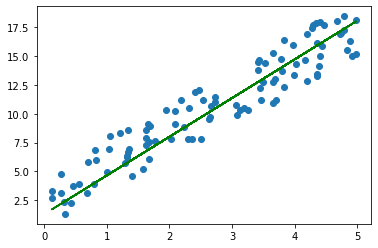

In [35]:
learning_rate = 0.005 

x = 5*np.random.rand(100, 1)
y = 3*x + 5*np.random.rand(100, 1)
w, b = gradient_descent(x, y, iters=100)

print('weight : ', w, 'bias :' , b)

plotting_graph(x, y, w, b)

array([[0.]])